# Import the libraries

In [1]:
import os
import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns 
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve

import warnings
warnings.filterwarnings("ignore")


# Data Analysis

In [2]:
# Dataset path

train = 'dataset/mnist_train.csv'
test = 'dataset/mnist_test.csv'

In [3]:
train_df = pd.read_csv(train)

In [4]:
train_df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape

(60000, 785)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


# Data Visualisation

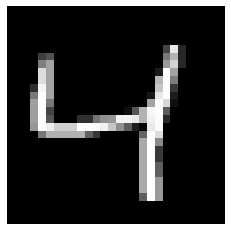

In [7]:
# Visualise number four as example and its label

four = train_df.iloc[2, 1:]
four = four.values.reshape(28, 28)
plt.imshow(four, cmap='gray');
plt.axis('off');

# Data Splitting

In [8]:
X = train_df.drop('label', axis=1)
Y = train_df['label']

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=.1, random_state=42)

In [9]:
# 5-detector will be an example of a binary classifier

y_train_5 = (y_train == 5)
y_val_5 = (y_val == 5)  

# Model Training & Validation

In [10]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
# CROSS-VALIDATION

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96283333, 0.96827778, 0.95305556])

In [12]:
# Valdidaion confusion_matrix

y_val_pred = cross_val_predict(sgd_clf, X_val, y_val_5, cv=3)
confusion_matrix(y_val_5, y_val_pred)

array([[5342,  107],
       [ 181,  370]], dtype=int64)

In [13]:
# Valdidaion Precision_score

precision = precision_score(y_val_5, y_val_pred)
print('precision: %.3f' % precision)

precision: 0.776


In [14]:
# Valdidaion recall_score

recall = recall_score(y_val_5, y_val_pred)
print('recall: %.3f' % recall)

recall: 0.672


In [15]:
# Valdidaion harmonic score

f1 = f1_score(y_val_5, y_val_pred)
print('f1_score: %.3f' % f1)

f1_score: 0.720


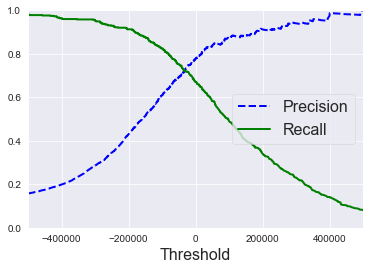

In [16]:
# precision & recall curve vs threshold

y_scores = cross_val_predict(sgd_clf, X_val, y_val_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_val_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-500000, 500000, 0, 1])           

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

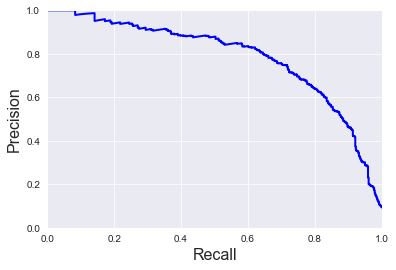

In [17]:
# precision & recall curve

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
plot_precision_vs_recall(precisions, recalls)    

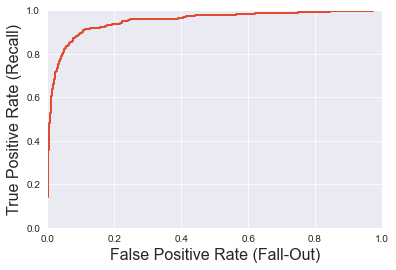

In [18]:
# plot ROC curve

fpr, tpr, thresholds = roc_curve(y_val_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            


plot_roc_curve(fpr, tpr)

In [19]:
y_scores

array([ -411893.02825144,  -429401.88212484,  -172808.66183802, ...,
        -481151.67466792, -1060345.84813847,    98784.42949312])

In [20]:
# compute roc & auc score

roc_auc_score = roc_auc_score(y_val_5, y_scores)
print('roc_auc_score: %.3f' % roc_auc_score)

roc_auc_score: 0.951


# Model Testing

In [21]:
test_df = pd.read_csv(test)

In [22]:
test_df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [24]:
y_test_5 = (y_test == 5) 

In [25]:
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
confusion_matrix(y_test_5, y_test_pred)

array([[8936,  172],
       [ 247,  645]], dtype=int64)

In [26]:
# test Precision_score

precision = precision_score(y_test_5, y_test_pred)
print('precision: %.3f' % precision)

precision: 0.789


In [27]:
# test recall_score

recall = recall_score(y_test_5, y_test_pred)
print('recall: %.3f' % recall)

recall: 0.723


In [28]:
# test harmonic score

f1 = f1_score(y_test_5, y_test_pred)
print('f1_score: %.3f' % f1)

f1_score: 0.755


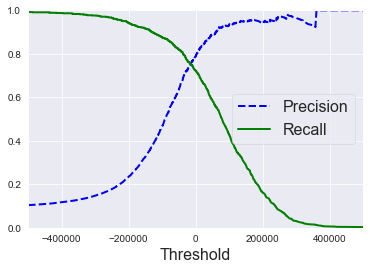

In [36]:
# precision & recall curve vs threshold

y_test_scores = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-500000, 500000, 0, 1])           

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

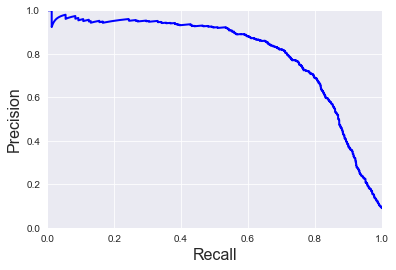

In [30]:
# precision & recall curve

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    
plot_precision_vs_recall(precisions, recalls)    

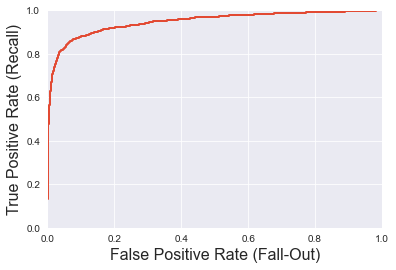

In [31]:
# plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test_5, y_test_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

    
plot_roc_curve(fpr, tpr)